# List 5
Jan Widanka

In the fifth assignment we are going to implement the "situation" version of the model presented in
http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0112203. We will present the solutions for complete graph with different sizes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

## Situation model

To construct our model we need to define $\textit{situation\_opinion}$ function, which takes 5 arguments:
- G: considered graph (in our case it will be complete graph),
- p: probability of acting independence,
- f: flexibility parameter,
- q: number of neighbors,
- MC: Monte Carlo steps.
Inside we create $\textit{nodes\_list}$, containing all the nodes in the graph G. We use $\textit{states\_list}$ to store the states of the system at each Monte Carlo step. The initial state is set to the initial opinion values. Inside the loop we copy the state from the previous Monte Carlo step to maintain continuity. We also shuffle the list of nodes to randomize the order in which they are updated. Then with probability $p$, we update the opinion of the current node and with the probability $f$ (flexibility parameter), change the sign of the opinion of the current node. If the update is not based on the node's own opinion ($1-p$ probability), we consider the opinions of its neighbors. Finally if all sampled neighbors have the same opinion, update the opinion of the current node to that common opinion. The function returns the list of states over all Monte Carlo steps.

In [4]:
def situation_opinion(G, p, f, q, MC):
    nodes_list = list(G.nodes())
    initial_values = [1] * G.number_of_nodes()

    states_list = [{} for _ in range(MC)]
    states_list[0] = dict(zip(nodes_list, initial_values))

    for i in range(1, MC):
        states_list[i] = states_list[i - 1].copy()
        random.shuffle(nodes_list)
        for node in nodes_list:
            if np.random.uniform() <= p:
                if np.random.uniform() <= f:
                    states_list[i][node] *= -1
            else:
                node_neighbors = list(G.neighbors(node))
                num_neighbors = len(node_neighbors)
                if num_neighbors > 0:
                    sample_size = min(q, num_neighbors)
                    sample_group = random.sample(node_neighbors, k = sample_size)
                    opinions = [states_list[i][x] for x in sample_group]
                    if all(opinion == opinions[0] for opinion in opinions):
                        states_list[i][node] = opinions[0]
                        
    return states_list

Now let us move to concrete graph, which in our case is going to be complete graph. The function $\textit{opinion_complete_graph}$ is defined to simulate opinion dynamics on a complete graph for a specified number of runs. We initialize the list $\textit{results}$ to store the results of magnetization for each run. Inside the loop over runs, a complete graph with specified number of nodes ($S$) is generated. Opinion dynamics are then simulated on considered graph using the $\textit{situation_opinion}$ function. The magnetization is calculated for each Monte Carlo step by summing the values of node opinions and normalizing by the total number of nodes ($S$). The magnetization results for each run are stored in the $\textit{results}$ list. At the end we simply convert the list of magnetization results for each run into an array and calculate the mean magnetization across all runs for each MC step by taking the mean along the axis of runs. The function returns a list containing the mean magnetizations. 

In [5]:
def opinion_complete_graph(num_runs, p, f, q, MC, S, graph_type):
    results = [0]*num_runs
    if graph_type == 'CG':
        for i in range(num_runs):
            G = nx.complete_graph(S)
            opinion = situation_opinion(G, p, f, q, MC)
            magnetization = [sum(state.values()) / S for state in opinion]
            results[i] = magnetization
    magnetizations_array = np.array(results)
    mean_magnetizations = np.mean(magnetizations_array, axis=0)
    return [mean_magnetizations, magnetizations_array]

## Simulation

In this part we are going to perform a simulation. The considered parameters are the probability $p$, for which we consider values from ($0$, $1$) by $0.01$. $q$, which we are also going to change for further analysis, but we take it by default being equal to $4$. $\textit{S_vals}$, which stands for the sizes of the complete graph. We also have the $\textit{f_vals}$, that contains all the values of flexibility parameter ($0.2$, $0.3$, $0.4$, $0.5$).

In [6]:
p_value_list = np.arange(0, 1.01, 0.01)
q = 4
num_runs = 400
S_vals = [100, 200, 500]
f_vals = [0.2, 0.3, 0.4, 0.5]
MC = 20

### Results for different sizes

Now we are going to show the final results for complete graph with all specified parameters. Below there are basically the same lines of codes just to perform the simulations for considered parameters.

#### Complete graph (100)

In [7]:
final_magnetizations_CG_100_f_02 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_02[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[0], q, MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion__complete_graph_S_100_f_0.2_MC_{MC}.txt", final_magnetizations_CG_100_f_02)

In [8]:
final_magnetizations_CG_100_f_03 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_03[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[1], q, MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion__complete_graph_S_100_f_0.3_MC_{MC}.txt", final_magnetizations_CG_100_f_03)

In [9]:
final_magnetizations_CG_100_f_04 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_04[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[2], q, MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_100_f_0.4_MC_{MC}.txt", final_magnetizations_CG_100_f_04)

In [10]:
final_magnetizations_CG_100_f_05 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_05[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q, MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_100_f_0.5_MC_{MC}.txt", final_magnetizations_CG_100_f_05)

#### Different $q$

In [11]:
q_vals = [4, 6, 8]

In [12]:
final_magnetizations_CG_100_f_05_q_4 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_05_q_4[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q_vals[0], MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_100_f_05_q_4_MC_{MC}.txt", final_magnetizations_CG_100_f_05_q_4)

In [13]:
final_magnetizations_CG_100_f_05_q_6 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_05_q_6[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q_vals[1], MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_100_f_05_q_6_MC_{MC}.txt", final_magnetizations_CG_100_f_05_q_6)

In [14]:
final_magnetizations_CG_100_f_05_q_8 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_f_05_q_8[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q_vals[2], MC, S_vals[0], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_100_f_05_q_8_MC_{MC}.txt", final_magnetizations_CG_100_f_05_q_8)

#### Complete graph (200)

In [15]:
final_magnetizations_CG_100_S_200_f_02 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_200_f_02[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[0], q, MC, S_vals[1], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_200_f_02_MC_{MC}.txt", final_magnetizations_CG_100_S_200_f_02)

In [16]:
final_magnetizations_CG_100_S_200_f_03 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_200_f_03[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[1], q, MC, S_vals[1], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_200_f_03_MC_{MC}.txt", final_magnetizations_CG_100_S_200_f_03)

In [17]:
final_magnetizations_CG_100_S_200_f_04 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_200_f_04[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[2], q, MC, S_vals[1], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_200_f_04_MC_{MC}.txt", final_magnetizations_CG_100_S_200_f_04)

In [18]:
final_magnetizations_CG_100_S_200_f_05 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_200_f_05[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q, MC, S_vals[1], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_200_f_05_MC_{MC}.txt", final_magnetizations_CG_100_S_200_f_05)

#### Complete graph (500)

In [19]:
final_magnetizations_CG_100_S_500_f_02 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_500_f_02[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[0], q, MC, S_vals[2], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_500_f_02_MC_{MC}.txt", final_magnetizations_CG_100_S_500_f_02)

In [20]:
final_magnetizations_CG_100_S_500_f_03 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_500_f_03[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[1], q, MC, S_vals[2], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_500_f_03_MC_{MC}.txt", final_magnetizations_CG_100_S_500_f_03)

In [21]:
final_magnetizations_CG_100_S_500_f_04 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_500_f_04[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[2], q, MC, S_vals[2], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_500_f_04_MC_{MC}.txt", final_magnetizations_CG_100_S_500_f_04)

In [22]:
final_magnetizations_CG_100_S_500_f_05 = [0]*len(p_value_list)
for i in range(len(p_value_list)):
    final_magnetizations_CG_100_S_500_f_05[i] = opinion_complete_graph(num_runs, p_value_list[i], f_vals[3], q, MC, S_vals[2], 'CG')[0][-1]
    np.savetxt(f"data/opinion_complete_graph_S_500_f_05_MC_{MC}.txt", final_magnetizations_CG_100_S_500_f_05)

## Complete graph - visualization

#### Loading the data from simulations

In [23]:
opinion_comp_graph_100_f_02_q_4 = np.loadtxt('data/opinion_complete_graph_S_100_f_05_q_4_MC_20.txt')
opinion_comp_graph_100_f_02_q_6 = np.loadtxt('data/opinion_complete_graph_S_100_f_05_q_6_MC_20.txt')
opinion_comp_graph_100_f_02_q_8 = np.loadtxt('data/opinion_complete_graph_S_100_f_05_q_8_MC_20.txt')

#### Plot with different number of neighbors

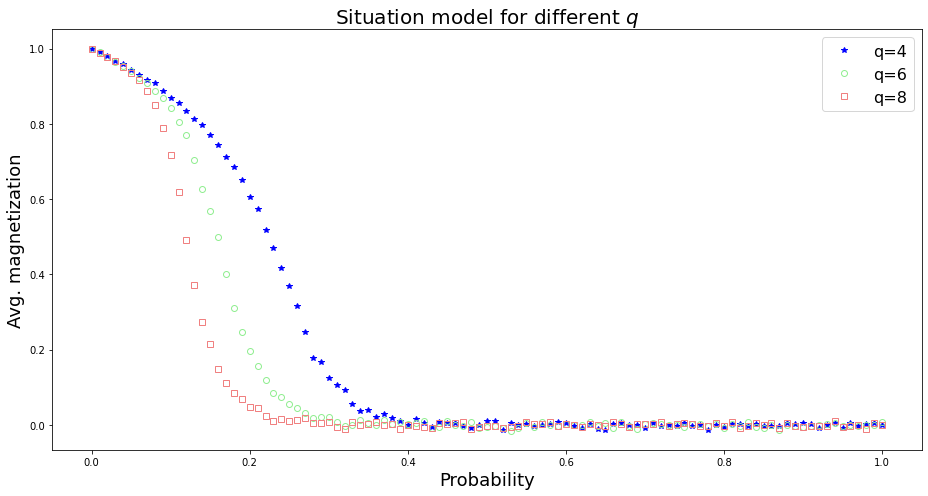

In [24]:
plt.figure(figsize=(13,7))

plt.plot(p_value_list, opinion_comp_graph_100_f_02_q_4, marker='*', color='blue',
            linestyle='None', label = 'q=4', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_100_f_02_q_6, marker='o', fillstyle='none', linestyle='None', 
            color='lightgreen', label = 'q=6', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_100_f_02_q_8, marker='s', fillstyle='none', linestyle='None', 
            color='lightcoral', label = 'q=8', lw = 0.4)
plt.title('Situation model for different $q$', fontsize=20)
plt.legend(fontsize = 16)
plt.xlabel('Probability', fontsize = 18)
plt.ylabel('Avg. magnetization', fontsize = 18)
plt.tight_layout()
plt.show()

The plot provides a visual representation of how different values of $q$ influence the average magnetization as a function of the probability of individual opinion updates ($p$). Changing the values of parameter $q$ show distinct patterns in magnetization. Larger values of $q$ ($q$=8) appear to result in lower average magnetization, suggesting a more varied opinion landscape. 

#### Loading the data from simulations

In [25]:
opinion_comp_graph_100_f_02 = np.loadtxt('data/opinion__complete_graph_S_100_f_0.2_MC_20.txt')
opinion_comp_graph_100_f_03 = np.loadtxt('data/opinion__complete_graph_S_100_f_0.3_MC_20.txt')
opinion_comp_graph_100_f_04 = np.loadtxt('data/opinion_complete_graph_S_100_f_0.4_MC_20.txt')
opinion_comp_graph_100_f_05 = np.loadtxt('data/opinion_complete_graph_S_100_f_0.5_MC_20.txt')

#### Plot for complete graph considering the probability dependence

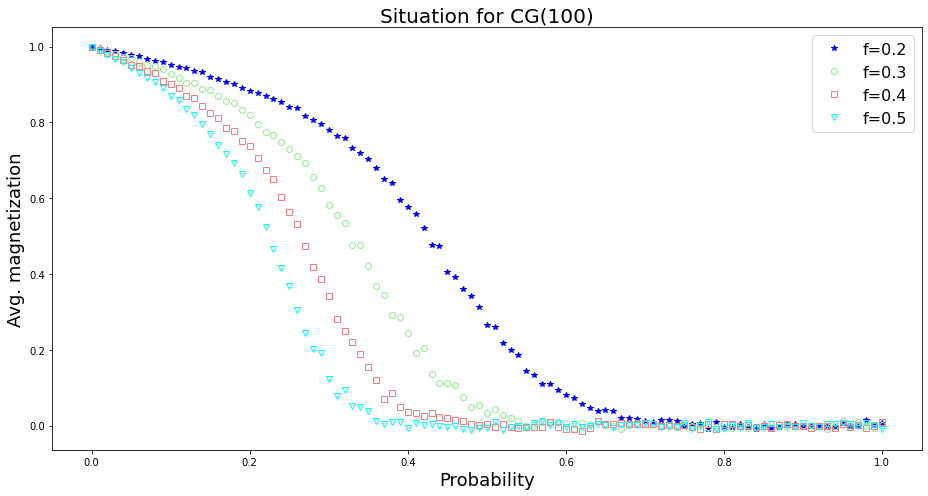

In [26]:
plt.figure(figsize=(13,7))

plt.plot(p_value_list, opinion_comp_graph_100_f_02, marker='*', color='blue',
            linestyle='None', label = 'f=0.2', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_100_f_03, marker='o', fillstyle='none', linestyle='None', 
            color='lightgreen', label = 'f=0.3', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_100_f_04, marker='s', fillstyle='none', linestyle='None', 
            color='lightcoral', label = 'f=0.4', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_100_f_05, marker='v', fillstyle='none', linestyle='None', 
            color='aqua', label = 'f=0.5', lw = 0.4)
plt.title('Situation for CG(100)', fontsize=20)
plt.legend(fontsize = 16)
plt.xlabel('Probability', fontsize = 18)
plt.ylabel('Avg. magnetization', fontsize = 18)
plt.tight_layout()
plt.show()

### Different size

#### Loading the data from simulations

In [27]:
opinion_comp_graph_200_f_02 = np.loadtxt('data/opinion_complete_graph_S_200_f_02_MC_20.txt')
opinion_comp_graph_200_f_03 = np.loadtxt('data/opinion_complete_graph_S_200_f_03_MC_20.txt')
opinion_comp_graph_200_f_04 = np.loadtxt('data/opinion_complete_graph_S_200_f_04_MC_20.txt')
opinion_comp_graph_200_f_05 = np.loadtxt('data/opinion_complete_graph_S_200_f_05_MC_20.txt')

#### Plot for complete graph considering the probability dependence

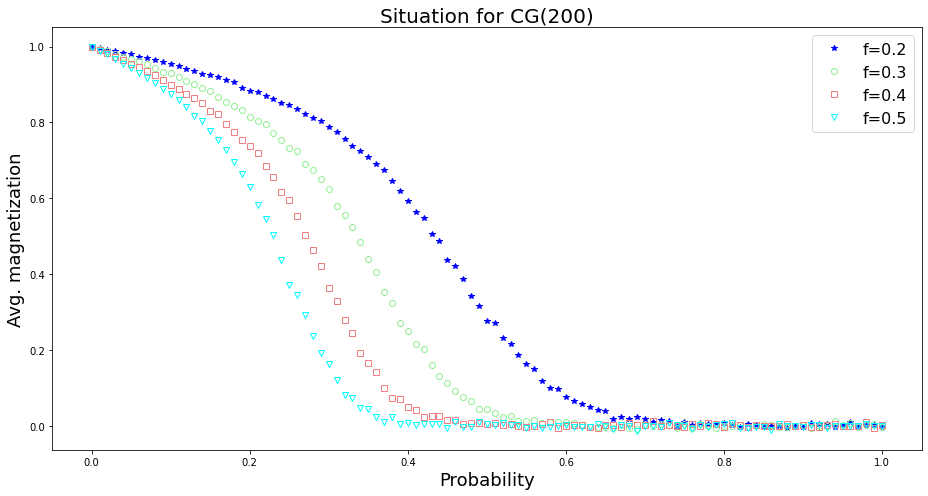

In [28]:
plt.figure(figsize=(13,7))

plt.plot(p_value_list, opinion_comp_graph_200_f_02, marker='*', color='blue',
            linestyle='None', label = 'f=0.2', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_200_f_03, marker='o', fillstyle='none', linestyle='None', 
            color='lightgreen', label = 'f=0.3', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_200_f_04, marker='s', fillstyle='none', linestyle='None', 
            color='lightcoral', label = 'f=0.4', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_200_f_05, marker='v', fillstyle='none', linestyle='None', 
            color='aqua', label = 'f=0.5', lw = 0.4)
plt.title('Situation for CG(200)', fontsize=20)
plt.legend(fontsize = 16)
plt.xlabel('Probability', fontsize = 18)
plt.ylabel('Avg. magnetization', fontsize = 18)
plt.tight_layout()
plt.show()

### CG(500)

#### Loading the data from simulations

In [29]:
opinion_comp_graph_500_f_02 = np.loadtxt('data/opinion_complete_graph_S_500_f_02_MC_20.txt')
opinion_comp_graph_500_f_03 = np.loadtxt('data/opinion_complete_graph_S_500_f_03_MC_20.txt')
opinion_comp_graph_500_f_04 = np.loadtxt('data/opinion_complete_graph_S_500_f_04_MC_20.txt')
opinion_comp_graph_500_f_05 = np.loadtxt('data/opinion_complete_graph_S_500_f_05_MC_20.txt')

#### Plot for complete graph considering the probability dependence

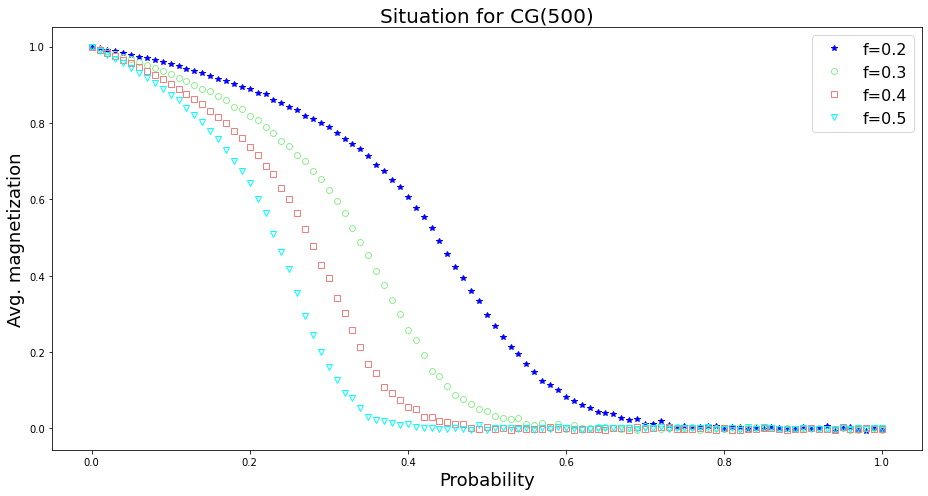

In [30]:
plt.figure(figsize=(13,7))

plt.plot(p_value_list, opinion_comp_graph_500_f_02, marker='*', color='blue',
            linestyle='None', label = 'f=0.2', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_500_f_03, marker='o', fillstyle='none', linestyle='None', 
            color='lightgreen', label = 'f=0.3', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_500_f_04, marker='s', fillstyle='none', linestyle='None', 
            color='lightcoral', label = 'f=0.4', lw = 0.4)
plt.plot(p_value_list, opinion_comp_graph_500_f_05, marker='v', fillstyle='none', linestyle='None', 
            color='aqua', label = 'f=0.5', lw = 0.4)
plt.title('Situation for CG(500)', fontsize=20)
plt.legend(fontsize = 16)
plt.xlabel('Probability', fontsize = 18)
plt.ylabel('Avg. magnetization', fontsize = 18)
plt.tight_layout()
plt.show()

From these graphs above we can see that higher values of flexibility parameter $f$ imply a higher probability of flipping the opinion sign when an individual updates their opinion. Consistent patterns in the magnetization curves for different values of $f$ across complete graph sizes can indicate the fact that observed behavior is not strongly dependent on the size of the network. Larger networks, such as in this case complete graph of size 500 shows more stable behavior in terms of opinion alignment.
Depending on the network structure and other parameters, higher flexibility might lead to more dynamic and varied opinion changes.